In [1]:
import matplotlib.pyplot as plt
import numpy as np

## FastPM

In [9]:
fastPMin = np.loadtxt("/home/siyizhao/SeeCosmology/data/pkl_z0/fastpm.dat")
k_fastPMin, pk_fastPMin = fastPMin[:, 0], fastPMin[:, 1]
fastPMlinear = np.loadtxt("/hscratch/siyizhao/ICs/fastpm/ics/test_pk_linear.txt")
k_fastPMlinear, pk_fastPMlinear = fastPMlinear[:, 0], fastPMlinear[:, 1]
fastPMout = np.loadtxt("/hscratch/siyizhao/ICs/fastpm/ics/test_pk_0.0200.txt")
k_fastPMout, pk_fastPMout = fastPMout[:, 0], fastPMout[:, 1]
data = np.load("LOG/Pk_fastpm.npz")
k_fastPMout_pylians, pk_fastPMout_pylians = data['k'], data['Pk0']

In [3]:
boxL = 1000
Ngrid = 512
k_nyquist = np.pi / (boxL / Ngrid)

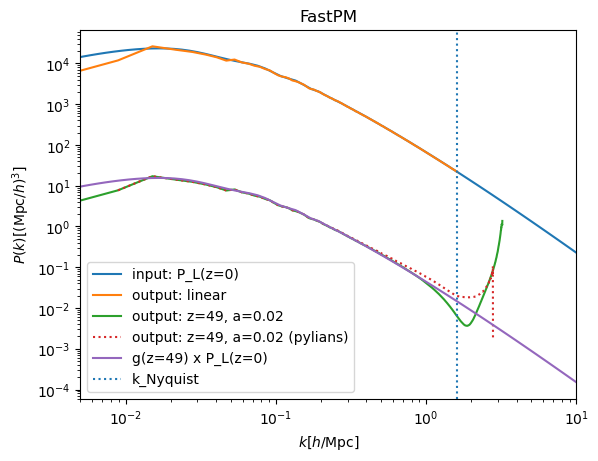

In [10]:
plt.plot(k_fastPMin, pk_fastPMin, label=f'input: P_L(z=0)')
plt.plot(k_fastPMlinear, pk_fastPMlinear, label=f'output: linear')
plt.plot(k_fastPMout, pk_fastPMout, label=f'output: z=49, a=0.02')
plt.plot(k_fastPMout_pylians, pk_fastPMout_pylians, ":", label=f'output: z=49, a=0.02 (pylians)')
plt.plot(k_fastPMin, pk_fastPMin*0.02573235**2, label='g(z=49) x P_L(z=0)')
plt.axvline(k_nyquist, 0,1, linestyle=':', label='k_Nyquist')
plt.xlabel(r'$k [h/{\rm Mpc}]$')
plt.xscale('log')
plt.xlim(0.005, 10)
plt.ylabel(r'$P(k) [({\rm Mpc}/h)^3]$')
plt.yscale('log')
plt.title('FastPM')
plt.legend()

## 2LPT_PNG


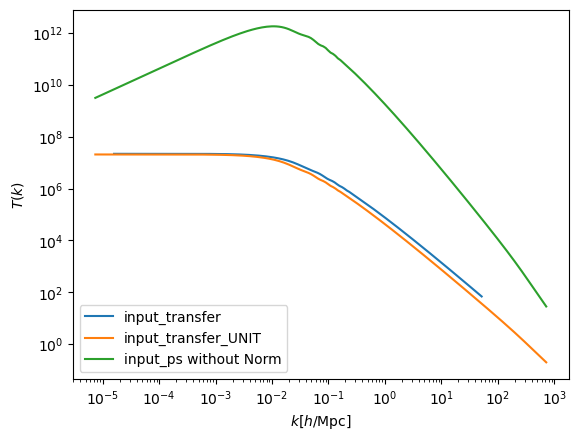

In [17]:
tf0 = np.loadtxt("/home/siyizhao/nG-ICs/run2LPTics/input_transfer.dat")
tf_UNIT = np.loadtxt("/home/siyizhao/nG-ICs/run2LPTics/input_transfer_UNIT.dat")
k_UNIT, tk_UNIT = tf_UNIT[:, 0], tf_UNIT[:, 1]
ps0 = np.loadtxt("/home/siyizhao/nG-ICs/run2LPTics/input_spectrum.dat")
k_2LPTin, pk_2LPTin = 10**ps0[:, 0], 10**ps0[:, 1]
plt.plot(tf0[:, 0], tf0[:, 1], label='input_transfer')
plt.plot(tf_UNIT[:, 0], tf_UNIT[:, 1], label='input_transfer_UNIT')
plt.plot(k_UNIT, k_UNIT*tk_UNIT**2, label='input_ps without Norm')
plt.xlabel(r'$k [h/{\rm Mpc}]$')
plt.xscale('log')
plt.ylabel(r'$T(k)$')
plt.yscale('log')
plt.legend()

In [11]:
data = np.load("LOG/Pk.npz")
k_2LPT = data['k']
Pk_2LPT = data['Pk0']

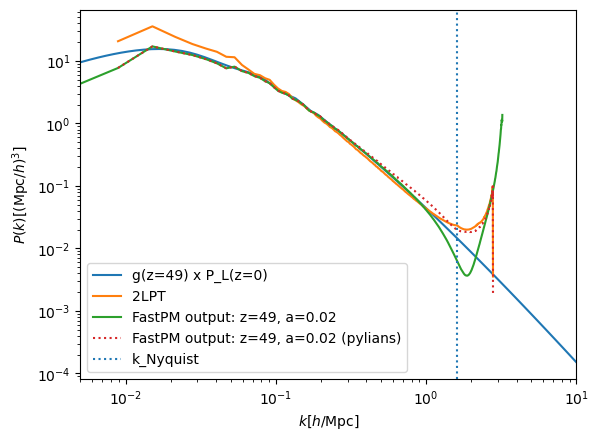

In [18]:
plt.plot(k_fastPMin, pk_fastPMin*0.02573235**2, label='g(z=49) x P_L(z=0)')
# plt.plot(k_2LPTin, pk_2LPTin*0.02573235**2, ':', label='g(z=49) x input_spectrum')
plt.plot(k_2LPT, Pk_2LPT, label='2LPT')
# plt.plot(k_UNIT, 1e-11* k_UNIT*tk_UNIT**2, label='input_ps without Norm')
plt.plot(k_fastPMout, pk_fastPMout, label=f'FastPM output: z=49, a=0.02')
plt.plot(k_fastPMout_pylians, pk_fastPMout_pylians, ":", label=f'FastPM output: z=49, a=0.02 (pylians)')

plt.axvline(k_nyquist, 0,1, linestyle=':', label='k_Nyquist')
plt.xlabel(r'$k [h/{\rm Mpc}]$')
plt.xscale('log')
plt.xlim(0.005, 10)
plt.ylabel(r'$P(k) [({\rm Mpc}/h)^3]$')
plt.yscale('log')
plt.legend()

The behaviour around k_Nyq should be due to the measurement method of power spectrum? 